## PandasAI and Ollama

### Data Analysis: Efficiency and Accessibility

In the field of data analysis, efficiency and accessibility are paramount for extracting valuable insights from complex datasets. PandasAI, an innovative Python library, marks a significant advancement by seamlessly integrating generative AI capabilities with the widely used pandas data manipulation tool. This groundbreaking fusion empowers users to interact with their data conversationally, uncovering hidden patterns, generating meaningful insights, and performing data transformations without extensive coding expertise.

![PandasAI](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXhafqtiy_CmQD2vSoLgDyMNZZ95SjSTQdcw&s)


### Unlocking the Power of Conversational Data Analysis

PandasAI leverages large language models (LLMs), trained on vast amounts of text data, to comprehend and respond to natural language queries. This functionality allows users to query their data in a simple, intuitive manner, akin to conversing with an intelligent assistant. For instance, users can instruct PandasAI to:

- Summarize data using descriptive statistics
- Identify trends and patterns within the dataset
- Visualize data through interactive charts and graphs
- Generate new features from existing data to enhance predictive modeling

### Automating Repetitive Tasks to Enhance Efficiency

PandasAI streamlines the data analysis process by automating many repetitive tasks that typically consume valuable time. This automation enables users to focus on deriving meaningful insights rather than spending hours on tedious data preparation and manipulation.

### Achieving Accurate and Insightful Results

PandasAI harnesses the advanced capabilities of LLMs to extract accurate and insightful information from data. It can identify subtle patterns, uncover hidden correlations, and generate comprehensive summaries, all while maintaining a high level of accuracy.

In [1]:
!pip install pandasai


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
pip show pandasai

Name: pandasai
Version: 2.2.12
Summary: Chat with your database (SQL, CSV, pandas, polars, mongodb, noSQL, etc). PandasAI makes data analysis conversational using LLMs (GPT 3.5 / 4, Anthropic, VertexAI) and RAG.
Home-page: 
Author: Gabriele Venturi
Author-email: 
License: MIT
Location: /Users/aboniasojasingarayar/Library/Python/3.9/lib/python/site-packages
Requires: pillow, pandas, duckdb, sqlalchemy, astor, scipy, sqlglot, matplotlib, requests, openai, pydantic, python-dotenv, jinja2, faker
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### EDA

In [2]:

from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM
import seaborn as sns 

# Load the Titanic dataset
data = sns.load_dataset('titanic')

ollama_llm = LocalLLM(api_base="http://localhost:11434/v1", model="mistral")
df = SmartDataframe(data, config={"llm": ollama_llm})

/Users/aboniasojasingarayar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
response = df.chat("""Return the survived class in percentage""")
response

The survived passengers represent 38.38% of the entire dataset.


<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


38.38

In [6]:
unique_counts = df.chat("""Count the unique values in the 'age' column.""")
unique_counts

89

In [ ]:
unique_values = df.chat("""Count the unique values in the 'embarked' column.""")
unique_values

In [ ]:
#Data Summary
summary = df.chat("""Can you get me the statistical summary of the dataset""")

#Class percentage
surv_pclass_perc = df.chat("""Return the survived in percentage breakdown by pclass""")

#Missing Data
missing_data_perc = df.chat("""Return the missing data percentage for the columns""")

#Outlier Data
outlier_fare_data = df.chat("""Please provide me the data rows that
contains outlier data based on fare column""")

## Data Visualization

Traceback (most recent call last):
  File "/Users/aboniasojasingarayar/Library/Python/3.9/lib/python/site-packages/pandasai/pipelines/chat/code_execution.py", line 97, in execute
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Value type <class 'NoneType'> must match with type plot

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aboniasojasingarayar/Library/Python/3.9/lib/python/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 333, in run
    output = (
  File "/Users/aboniasojasingarayar/Library/Python/3.9/lib/python/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/Users/aboniasojasingarayar/Library/Python/3.9/lib/python/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/Users/aboniasojasingarayar/Library/Python/3.9/lib/python/site-packages/pandasai/pipelines/chat/c

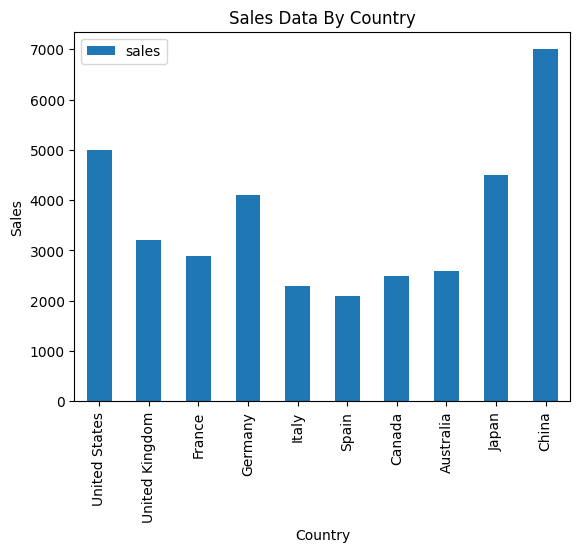

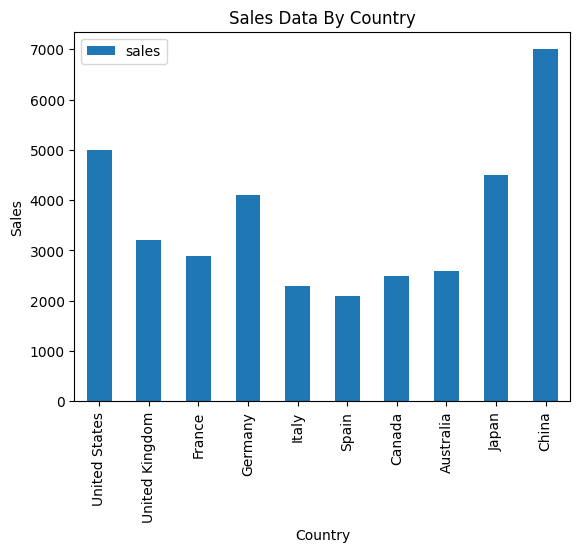

In [3]:
import pandas as pd
# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

ollama_llm = LocalLLM(api_base="http://localhost:11434/v1", model="mistral")
df = SmartDataframe(sales_by_country, config={"llm": ollama_llm})

sales_plot = df.chat("""Plot the sales data by country.""")

In [ ]:
kde_plot = df.chat("""Please plot the kde distribution of age column and separate them with survived column""")

box_plot = df.chat("""Return me the box plot visualization of the age column separated by sex""")

heat_map = df.chat("""Give me heat map plot to visualize the numerical columns correlation""")

count_plot = df.chat("""Visualize the categorical column sex and survived""")

In [ ]:
response = df.chat('Please provide me the fare data distribution visualization')
response

## Data Transformation:

In [ ]:

# Standardize numerical data using natural language
print(pandas_ai.run(df, prompt="Standardize the 'Fare' column"))

## Feature Engineering:

In [ ]:
# Generate new features using natural language
print(pandas_ai.run(df, prompt="Create a new feature 'Passenger Class Group' based on 'Pclass'"))

### Pandas AI Skills and Agents

In [ ]:
import pandas as pd
from pandasai import Agent
from pandasai.skills import skill

employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

# Function doc string to give more context to the model for use of this skill
@skill
def plot_salaries(names: list[str], salaries: list[int]):
    """
    Displays the bar chart  having name on x-axis and salaries on y-axis
    Args:
        names (list[str]): Employees' names
        salaries (list[int]): Salaries
    """
    # plot bars
    import matplotlib.pyplot as plt

    plt.bar(names, salaries)
    plt.xlabel("Employee Name")
    plt.ylabel("Salary")
    plt.title("Employee Salaries")
    plt.xticks(rotation=45)

    # Adding count above for each bar
    for i, salary in enumerate(salaries):
        plt.text(i, salary + 1000, str(salary), ha='center', va='bottom')
    plt.show()


agent = Agent([employees_df, salaries_df], config = {'llm': llm})
agent.add_skills(plot_salaries)

response = agent.chat("Plot the employee salaries against names")

In [ ]:
import pandasai as pai
pai.clear_cache()

### Conclusion

PandasAI represents a major advancement in data analysis, effectively bridging the gap between traditional coding methods and intuitive natural language interactions. By automating repetitive tasks, generating accurate insights, and seamlessly transforming data, it enables users to extract maximum value from their data without needing extensive coding skills. As PandasAI continues to evolve, it is set to revolutionize the way data scientists, analysts, and anyone working with data interact with and derive insights from the ever-expanding sea of information.

![PandasAI](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*oHz4ylE7Dzf8BYt12PKFog.png)